**Sentiment Analysis Using Vader Model**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [91]:
df = pd.read_csv('/content/tweets.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(1000, 7)
(500, 7)


In [92]:
df.head()

,Tweet ID,Text,User,Created At,Likes,Retweets,Sentiment
0,449211727471646420,Feeling grateful for my friends and family.,werickson,2023-01-13 00:35:08,156,489,positive
1,519036665081652813,Going for a walk in the park.,jennybutler,2023-02-16 06:24:30,223,788,neutral
2,776023316169815671,I hate it when things don't go my way.,william88,2023-01-24 18:12:37,332,860,negative
3,674750468135750054,I hate it when things don't go my way.,lawrencebauer,2023-02-09 07:14:24,388,881,negative
4,859726107390311299,This is the best day ever!,gerald07,2023-02-28 06:55:54,255,567,positive


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


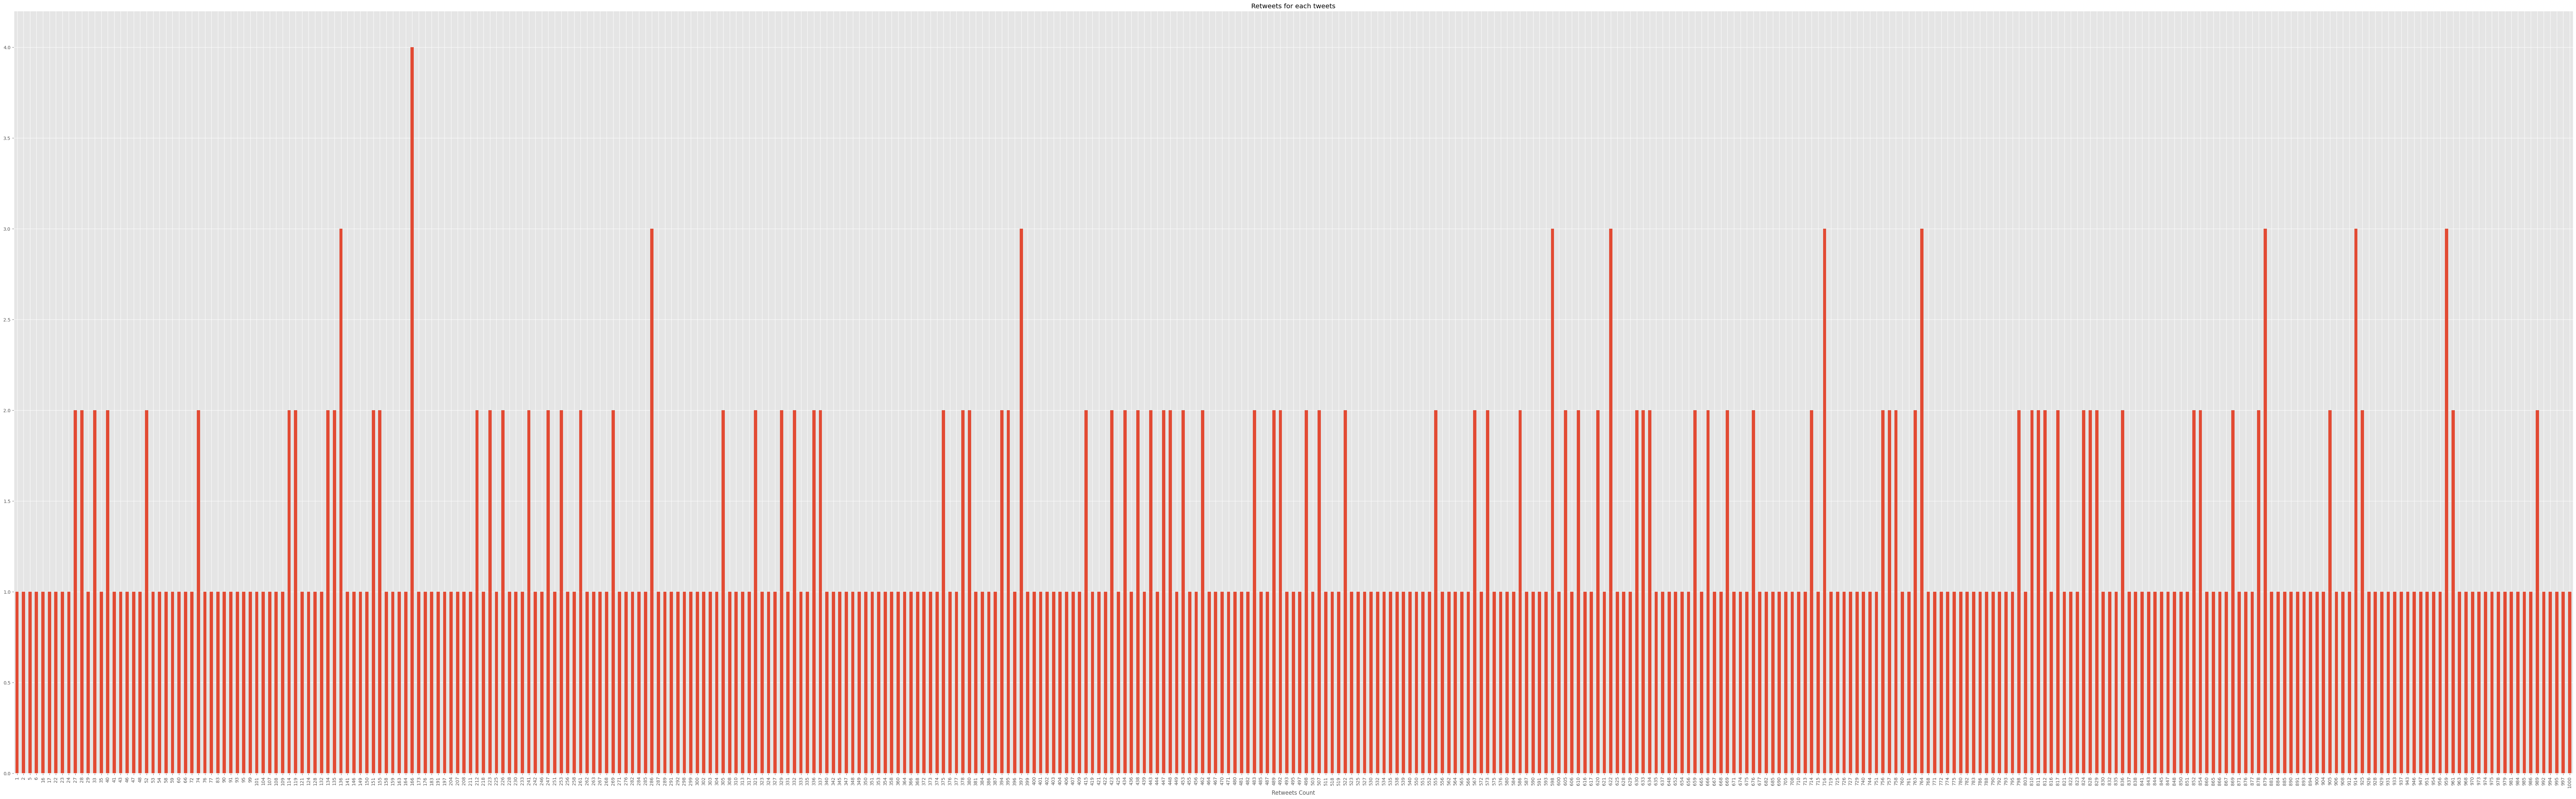

In [93]:
ax = df['Retweets'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Retweets for each tweets',
          figsize=(100, 30))
ax.set_xlabel('Retweets Count')
plt.show()

In [94]:
example = df['Text'][50]
print(example)

Feeling disappointed in myself.


In [95]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [97]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [98]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [99]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Feeling', 'disappointed', 'in', 'myself', '.']

In [100]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Feeling', 'disappointed', 'in', 'myself', '.']

In [101]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Feeling', 'VBG'),
 ('disappointed', 'VBN'),
 ('in', 'IN'),
 ('myself', 'PRP'),
 ('.', '.')]

In [102]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S Feeling/VBG disappointed/VBN in/IN myself/PRP ./.)


In [103]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [104]:
# This code is just to check wheather the model is working or not.
sia.polarity_scores('Today was such a beautiful day, I feel so blessed.')

{'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'compound': 0.8718}

In [105]:
# This code is just to check wheather the model is working or not.
sia.polarity_scores("Had a terrible day at work, can't wait to go home and forget about it")

{'neg': 0.294, 'neu': 0.706, 'pos': 0.0, 'compound': -0.6124}

In [106]:
# This code is just to check wheather the model is working on main dataset or not.
sia.polarity_scores(example)

{'neg': 0.47, 'neu': 0.303, 'pos': 0.227, 'compound': -0.3818}

In [107]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Tweet ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [108]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Tweet ID'})
vaders = vaders.merge(df, how='left')

In [109]:
vaders.head()

,Tweet ID,neg,neu,pos,compound,Text,User,Created At,Likes,Retweets,Sentiment
0,449211727471646420,0.000,0.345,0.655,0.7650,Feeling grateful for my friends and family.,werickson,2023-01-13 00:35:08,156,489,positive
1,519036665081652813,0.000,1.000,0.000,0.0000,Going for a walk in the park.,jennybutler,2023-02-16 06:24:30,223,788,neutral
2,776023316169815671,0.346,0.654,0.000,-0.5719,I hate it when things don't go my way.,william88,2023-01-24 18:12:37,332,860,negative
3,674750468135750054,0.346,0.654,0.000,-0.5719,I hate it when things don't go my way.,lawrencebauer,2023-02-09 07:14:24,388,881,negative
4,859726107390311299,0.000,0.527,0.473,0.6696,This is the best day ever!,gerald07,2023-02-28 06:55:54,255,567,positive


Mean score: 0.08
Median score: 0.00
Standard deviation: 0.53
Range: [-0.57, 0.77]


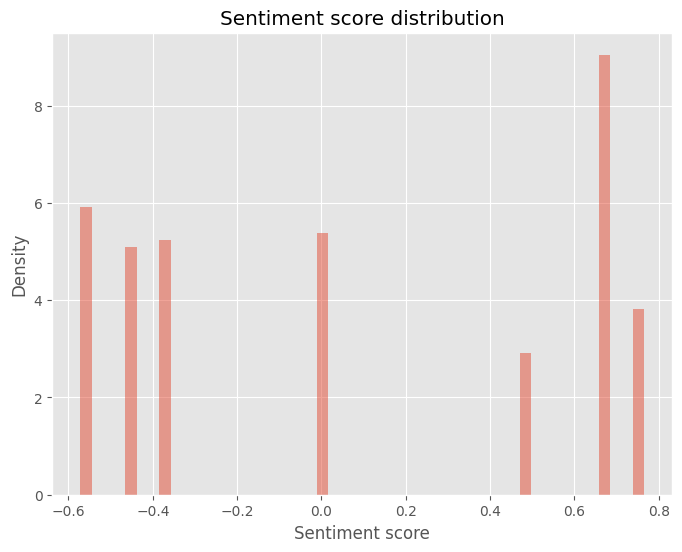

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Compute descriptive statistics on sentiment scores
sentiment_scores = vaders['compound']
mean_score = np.mean(sentiment_scores)
median_score = np.median(sentiment_scores)
std_score = np.std(sentiment_scores)
min_score = np.min(sentiment_scores)
max_score = np.max(sentiment_scores)
print(f"Mean score: {mean_score:.2f}")
print(f"Median score: {median_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")
print(f"Range: [{min_score:.2f}, {max_score:.2f}]")

# Plot sentiment score distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(sentiment_scores, bins=50, density=True, alpha=0.5)
ax.set_xlabel("Sentiment score")
ax.set_ylabel("Density")
ax.set_title("Sentiment score distribution")
plt.show()


In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate predicted sentiment labels based on Vader compound scores
vaders['predicted_sentiment'] = vaders['compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Calculate evaluation metrics
accuracy = accuracy_score(df['Sentiment'], vaders['predicted_sentiment'])
precision = precision_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')
recall = recall_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')
f1 = f1_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.92
Precision: 0.94
Recall: 0.92
F1 Score: 0.92


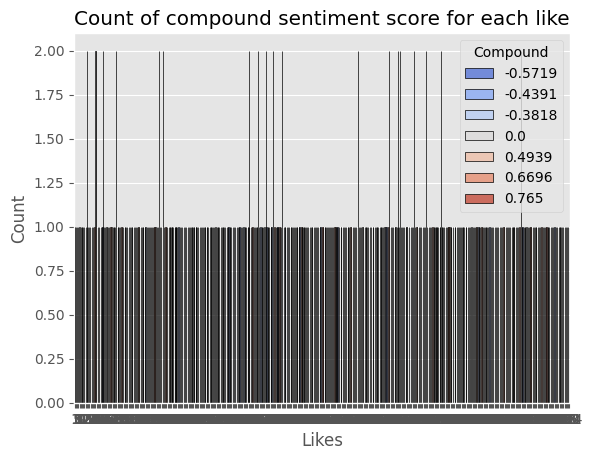

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='compound', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of compound sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='Compound', loc='upper right')

# Show plot
plt.show()


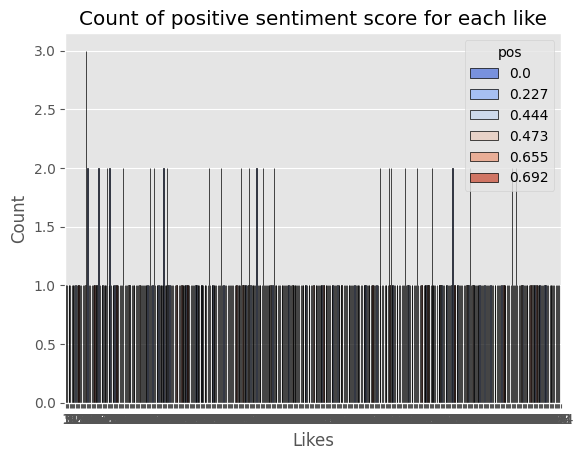

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='pos', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of positive sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='pos', loc='upper right')

# Show plot
plt.show()

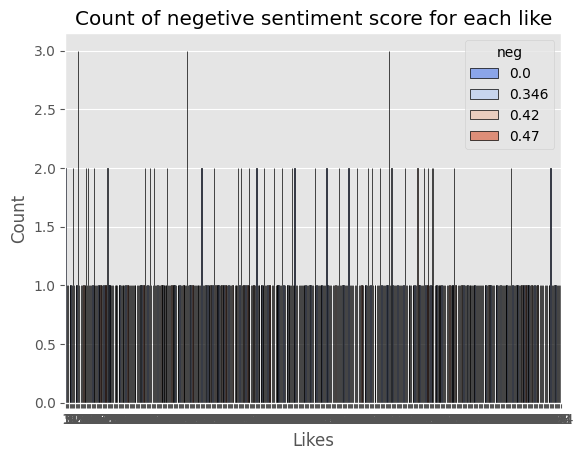

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='neg', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of negetive sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='neg', loc='upper right')

# Show plot
plt.show()

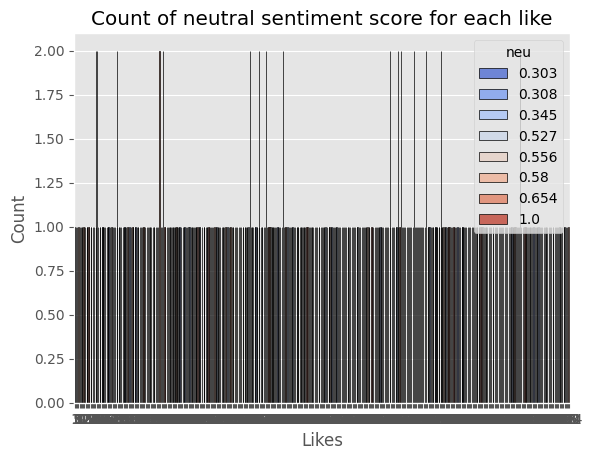

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='neu', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of neutral sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='neu', loc='upper right')

# Show plot
plt.show()

**Sentiment Analysis Using Roberta Model**

In [113]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [115]:
print(example)
sia.polarity_scores(example)

Feeling disappointed in myself.


{'neg': 0.47, 'neu': 0.303, 'pos': 0.227, 'compound': -0.3818}

In [116]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9489647, 'roberta_neu': 0.046515327, 'roberta_pos': 0.00451991}


In [117]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [118]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Tweet ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [119]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Tweet ID'})
results_df = results_df.merge(df, how='left')

**Compare Scores between models**

In [34]:
results_df.columns

Index(['Tweet ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Text', 'User',
       'Created At', 'Likes', 'Retweets'],
      dtype='object')

In [123]:
# Define a function to convert sentiment scores to labels
def scores_to_labels(scores_dict):
    pos_score = scores_dict['roberta_pos']
    neg_score = scores_dict['roberta_neg']
    if pos_score > neg_score:
        return 'positive'
    elif neg_score > pos_score:
        return 'negative'
    else:
        return 'neutral'

# Add a predicted label column to the results dataframe
results_df['roberta_predicted'] = results_df.apply(lambda x: scores_to_labels(x[['roberta_neg', 'roberta_neu', 'roberta_pos']].to_dict()), axis=1)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = results_df['Sentiment']
y_pred = results_df['roberta_predicted']
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.778
Precision: 0.8692579505300353
Recall: 0.6666666666666666
F1 Score: 0.5853479853479854


**Combine and compare**

<Figure size 100x100 with 0 Axes>

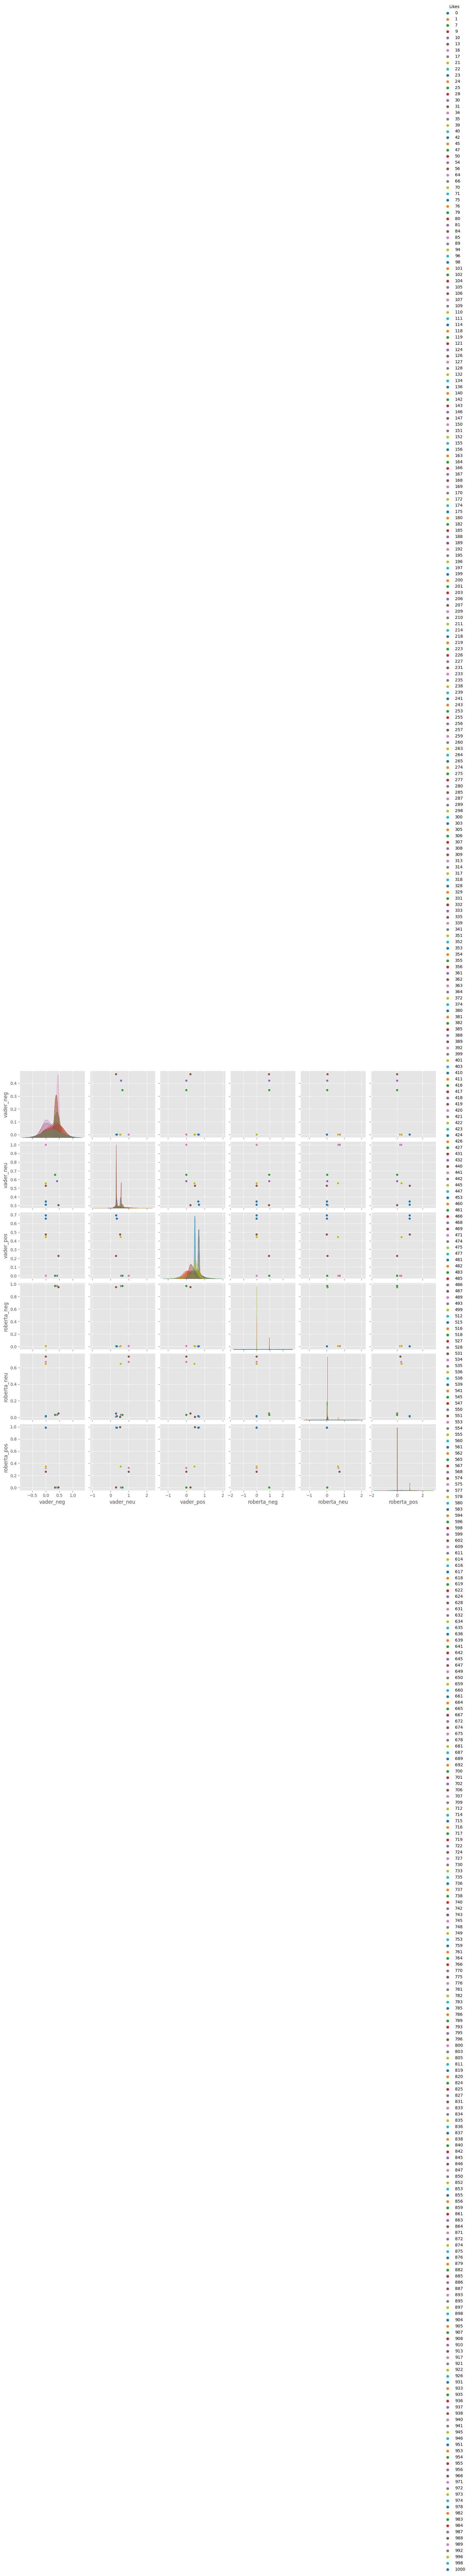

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Likes',
            palette='tab10')
plt.show()

**The Transformers Pipeline**

In [36]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
sent_pipeline('Feeling like a failure today, nothing seems to be going right.')

[{'label': 'NEGATIVE', 'score': 0.9997739195823669}]

In [38]:
sent_pipeline('Feeling optimistic about the future, so many exciting things ahead!')

[{'label': 'POSITIVE', 'score': 0.9998522996902466}]